In [3]:
import pandas as pd
## load the dataset
df = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', delimiter='\t', header=None)
df

,0,1
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


###  I pick KMeans as the clustering algorithms. By looking at distributions of the data,  it seems it contains several clusters (which look like “spheroids” ) which can be easily clustered using Kmeans with number of clusters around 4-5.  

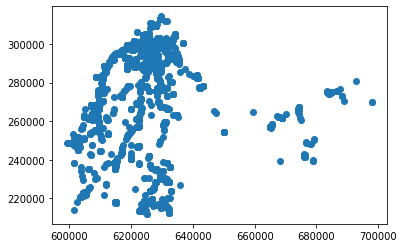

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df[0], df[1])
plt.show()

### 2. preprocessing of data to have zero mean and unit standard variance, hyperparametters include number of clusters, tolerance for convergence, number of initializations and number of iterations

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[0.11323554, 0.41347453],
       [0.13401564, 0.41352356],
       [0.13376067, 0.41430792],
       ...,
       [0.12177705, 0.41175874],
       [0.11476536, 0.41283724],
       [0.11310805, 0.41308235]])

In [14]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(scaled_data)
kmeans.cluster_centers_

array([[ 0.18409579,  0.3764703 ],
       [-2.17446098, -1.83562966],
       [ 0.21674948, -2.98549528],
       [ 6.03405456, -1.37858241]])

## Output from the algorithm

cluster 0 has 11439 samples
cluster 1 has 1354 samples
cluster 2 has 555 samples
cluster 3 has 119 samples


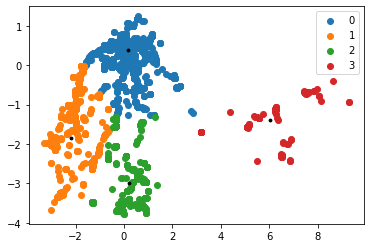

In [17]:
color = ['red', 'green', 'blue', 'yellow', 'black']
for i in range(k):
    plt.scatter(scaled_data[labels == i , 0] , scaled_data[labels == i , 1] , label = i)
    print("cluster " + str(i) + " has " + str(np.sum(labels == i)) + " samples")
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 8, color = 'k')

plt.legend()
plt.show()

## Use inertial (Within-cluster sum-of-squares) to measure the performance of Kmeans. Visually the cluster output looks reasonable. 

In [16]:
kmeans.inertia_

4428.809480662778

In [8]:
kmeans_inertia = pd.DataFrame(data=[], index=range(2, 21), columns=['inertia'])

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters)
    cutoff = 99
    kmeans.fit(scaled_data)
    kmeans_inertia.loc[n_clusters] = kmeans.inertia_

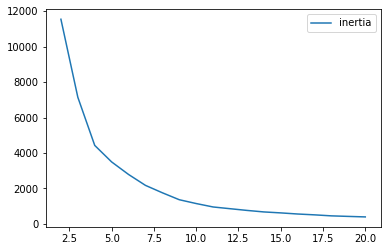

In [9]:
ax = plt.gca()

kmeans_inertia.plot(kind='line', y='inertia', ax=ax)
plt.show()